In [21]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
# get input data
df = pd.read_csv('./ratings_uvg.csv')
df

,ID,objects,rate,distance,timestamp
0,26,BlueSpin_GPCC_TRISOUP_r02_d200,1,0,2023-10-10-11:00:28+02:00
1,26,BlueSpin_GPCC_TRISOUP_r03_d200,3,0,2023-10-10-11:00:59+02:00
2,26,ReadyForWinter_GPCC_OCTREE_r03_d200,2,0,2023-10-10-11:01:28+02:00
3,26,BlueSpin_VPCC_r01_d200,1,0,2023-10-10-11:01:57+02:00
4,26,FlowerDance_VPCC_r03_d200,2,0,2023-10-10-11:02:30+02:00
...,...,...,...,...,...
1754,60,ReadyForWinter_GPCC_OCTREE_r03_d200,1,0,2023-10-24-11:13:01+02:00
1755,60,ReadyForWinter_VPCC_r01_d200,2,0,2023-10-24-11:13:29+02:00
1756,60,ReadyForWinter_GPCC_OCTREE_r04_d200,4,0,2023-10-24-11:13:56+02:00
1757,60,ReadyForWinter_GPCC_TRISOUP_r01_d200,1,0,2023-10-24-11:14:23+02:00


In [23]:
objects_rates = {}
for i in range(len(df["objects"])):
    metadata = df["objects"][i].split("_")
    object = metadata[0]
    codec = metadata[1]
    quality = metadata[-2]

    if len(metadata) == 5:
        codec = "{}_{}".format(metadata[1], metadata[2])
        
    if object in objects_rates:
        if codec in objects_rates[object]:
            if quality in objects_rates[object][codec]:
                objects_rates[object][codec][quality].append(df["rate"][i])
            else:
                objects_rates[object][codec][quality] = [df["rate"][i]]
        else:
            objects_rates[object][codec] = {
                quality: [df["rate"][i]]
            }
    else:
        objects_rates[object] = {
            codec: {
                quality: [df["rate"][i]]
            }
        }

print(objects_rates)

{'BlueSpin': {'GPCC_TRISOUP': {'r02': [1, 1, 3, 2, 2, 3, 3, 2, 5, 1, 1, 3, 3, 1, 2, 2, 2, 3, 3, 4, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3], 'r03': [3, 3, 2, 3, 3, 4, 3, 5, 3, 3, 3, 4, 2, 3, 5, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2], 'r01': [1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2], 'r04': [3, 3, 4, 3, 2, 5, 4, 5, 5, 2, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 5, 2, 2, 4, 5, 3, 4, 4, 4, 3, 5, 3, 4, 4]}, 'VPCC': {'r01': [1, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2], 'r05': [3, 1, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 4, 2, 3, 3], 'r03': [2, 1, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3], 'r02': [2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 3, 1, 2, 2], 'r04': [3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, 1, 3, 4, 3, 3, 3, 3, 

In [24]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#D7191C', '#2C7BB6', 'orange', 'purple']


In [26]:
def drawBoxPlotV2(data_groups, ouputPath, title, x_labels, legends, x_title, y_title):
    width       = 1/len(x_labels*2)
    xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_groups[0])) ]

    # symbol      = 'r+'
    ymin        = 0 #min ( [ val  for dg in data_groups  for data in dg for val in data ] )
    ymax        = 5 # max ( [ val  for dg in data_groups  for data in dg for val in data ])

    plt.figure(figsize=(12, 5))

    ax = plt.gca()
    ax.set_ylim(ymin,ymax)
    ax.grid(True, linestyle='dotted')
    ax.set_axisbelow(True)

    plt.xlabel(x_title,fontsize=25)
    plt.ylabel(y_title,fontsize=25)

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    space = len(data_groups)/2

    # --- Offset the positions per group:

    group_positions = []
    for num, dg in enumerate(data_groups):    
        _off = (0 - space + (0.5+num))
        # print(_off)
        group_positions.append([x+_off*(width+0.01) for x in xlocations])

    bp = []
    for dg, pos, c in zip(data_groups, group_positions, colors):
        bp.append(ax.boxplot(dg, 
                    labels=['']*len(x_labels),
                    positions=pos, 
                    widths=width, 
                    boxprops=dict(facecolor=c),
                    medianprops=dict(color='black'),
                    patch_artist=True,
                    )
        )
    data_labels = [bp[i]["boxes"][0] for i in range(len(bp))]
    plt.legend(data_labels, legends,ncol=len(data_groups), bbox_to_anchor=(0.95, 1.2))
    ax.set_xticks( xlocations )
    ax.set_xticklabels( x_labels, rotation=0 )

    plt.tight_layout()
    plt.savefig("{}/{}_updated_legend.pdf".format(ouputPath, title))
    # plt.show()

    for i in range(len(x_labels)):
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[0], np.average(data_groups[0][i]), np.median(data_groups[0][i]), np.max(data_groups[0][i]), np.min(data_groups[0][i]), np.std(data_groups[0][i])))
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[1], np.average(data_groups[1][i]), np.median(data_groups[1][i]), np.max(data_groups[1][i]), np.min(data_groups[1][i]), np.std(data_groups[1][i])))
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[3], np.average(data_groups[3][i]), np.median(data_groups[3][i]), np.max(data_groups[3][i]), np.min(data_groups[3][i]), np.std(data_groups[3][i])))


In [27]:
# constants

# videos
blueSpin = "BlueSpin"
readyForWinter = "ReadyForWinter"
flowerDance = "FlowerDance"
casualSquat = "CasualSquat"

# qualities
r1 = "r01"
r2 = "r02"
r3 = "r03"
r4 = "r04"
r5 = "r05"
raw = "raw"

Q1 = "Q1"
Q2 = "Q2"
Q3 = "Q3"
Q4 = "Q4"
Q5 = "Q5"
Q0 = "Raw"

# codecs
g_trisoup = 'GPCC_TRISOUP'
g_octree = 'GPCC_OCTREE'
v_ = 'VPCC'

In [28]:
# for video in [longDress,loot]:
#     for quality in [r11,r33,r55,r13,r15,r31,r35,r51,r53]:
#         print("{},{},{}\n".format(video,quality,objects_rates[video][quality][d500]))

# for video in [redBlack,soldier]:
#     for quality in [r1,r3,r5]:
#         print("{},{},{}\n".format(video,quality,objects_rates[video][quality][d500]))

## QoMEX - Task 1

VPCC
[[[1, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2], [2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 3, 1, 2, 2], [2, 1, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3], [3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, 1, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3], [3, 1, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 4, 2, 3, 3], [4, 2, 4, 3, 3, 4, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 3, 3, 5, 5, 4, 4, 4, 4, 5, 3, 4, 4]], [[1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2], [2, 1, 3, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2], [3, 1, 3, 1, 3, 2, 3, 2, 5, 2, 2, 3, 3, 2, 3, 3, 4, 3, 4, 4, 3, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 2, 3, 2], [1, 4, 2, 3, 3, 3, 3, 4, 2, 4, 4, 4, 3, 3, 5, 4, 4, 4, 4, 4, 

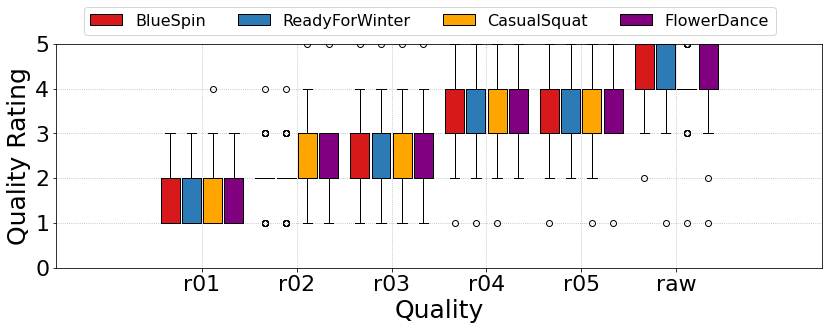

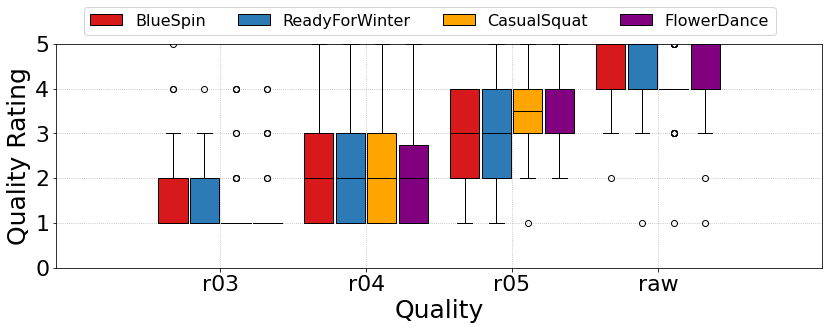

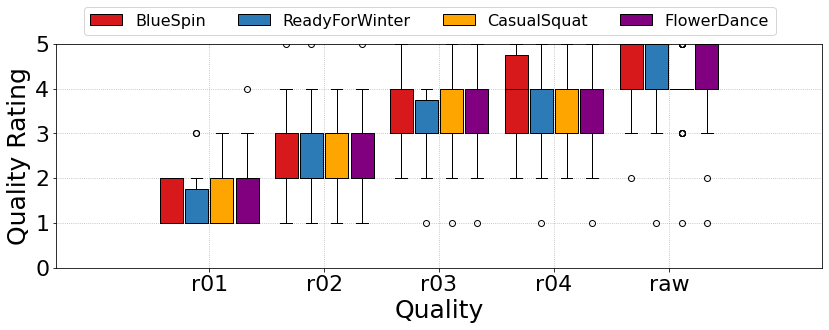

In [51]:
plt.rcParams.update({'font.size': 16})
q1=r1
q2=r2
q3=r3
q4=r4
q5=r5
q0 =raw

codecs = [v_, g_octree, g_trisoup]

for codec in codecs:
    print(codec)
    title = "task1_constant_" + codec 
    video1 = blueSpin
    video2 = readyForWinter
    video3 = casualSquat
    video4 = flowerDance

    videos = [video1, video2, video3, video4]

    qualities = [q1, q2, q3, q4, q5]
    if codec == g_octree:
        qualities = [q3, q4, q5]
    if codec == g_trisoup:
        qualities = [q1, q2, q3, q4]

    data = []
    for video in videos:
        data.append([])
        for q in qualities:
            data[-1].append(objects_rates[video][codec][q])
        data[-1].append(objects_rates[video][v_][q0])
        
        # data.append([
        #         objects_rates[video][codec][q1],
        #         objects_rates[video][codec][q2],
        #         objects_rates[video][codec][q3],
        #         objects_rates[video][codec][q4],
        #         objects_rates[video][v_][q0]])

    print(data)

    x = qualities
    x.append(q0)
    print(x)
    outputPath = "./"
    drawBoxPlotV2(data, outputPath, title, x, videos, "Quality", "Quality Rating")

# Radar plot

colors = ['#D7191C', '#2C7BB6']

In [24]:
def plot_radar(categories, traces, names, outputPath, title):
    fig = go.Figure()

    for i in range(len(traces)):
        fig.add_trace(go.Scatterpolar(
            r=traces[i],
            theta=categories,
            fill='toself',
            name=names[i]
        ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[1, 10]
        )),
    showlegend=True
    )

    fig.show()
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))

In [25]:
plt.style.use('ggplot')
import matplotlib as mpl

plt.rcParams.update({'font.size': 22})

COLOR = "black"
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


def plot_radar_v2(categories, traces, names, outputPath, title, x_labels):
    angles=np.linspace(0,2*np.pi,len(categories), endpoint=False)

    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(polar=True)

    categories += categories[:1]
    angles = np.append(angles,angles[:1])

    x_labels += x_labels[:1]

    print("{}".format(x_labels))
    for i in range(len(traces)):

        traces[i] += traces[i][:1]

        ax.plot(angles,traces[i], 'o-', color=colors[i], linewidth=2, label=names[i])
        ax.fill(angles, traces[i], alpha=0.25, color=colors[i])
        print("{}".format(traces[i]))

    ax.set_thetagrids(angles * 180/np.pi, x_labels)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)


    plt.grid(True)

    fig.show()
    # plt.legend(bbox_to_anchor=(1.1,0.6))
    plt.legend(ncol=2,bbox_to_anchor=(1.1,1.25))
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))


['Q11', 'Q22', 'Q33', 'Q12', 'Q21', 'Q23', 'Q32', 'Q13', 'Q31', 'Q11']
[4.53125, 6.90625, 7.53125, 5.21875, 5.125, 7.09375, 7.34375, 5.59375, 5.125, 4.53125]
[4.21875, 5.96875, 7.03125, 4.75, 4.625, 6.21875, 6.3125, 5.15625, 5.09375, 4.21875]


/var/folders/3b/q3j0_8jx1r16_v2mnl8r9w2w0000gn/T/ipykernel_3641/3102720053.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


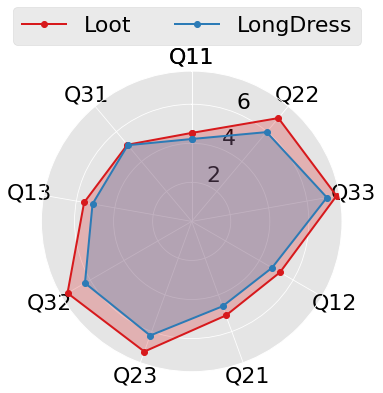

In [26]:
video1=loot
video2=longDress
categories = [r11, r33, r55, r13, r31, r35, r53, r15, r51]
x_labels = [Q11, Q22, Q33, Q12, Q21, Q23, Q32, Q13, Q31]
trace_1 = [np.average(objects_rates[video1][i][d500]) for i in categories]
trace_2 = [np.average(objects_rates[video2][i][d500]) for i in categories]
traces = [
    trace_1, trace_2
]
title="quality_radar_task_1"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
plot_radar_v2(categories, traces, [video1, video2], outputPath, title, x_labels)


['r1_d125', 'r1_d250', 'r1_d500', 'r3_d125', 'r3_d250', 'r3_d500', 'r5_d125', 'r5_d250', 'r5_d500']
[3.1875, 3.6875, 4.78125, 5.03125, 5.84375, 6.625, 6.1875, 6.5, 7.21875]
['Q1_D1', 'Q1_D2', 'Q1_D3', 'Q2_D1', 'Q2_D2', 'Q2_D3', 'Q3_D1', 'Q3_D2', 'Q3_D3', 'Q1_D1']
[3.1875, 3.6875, 4.78125, 5.03125, 5.84375, 6.625, 6.1875, 6.5, 7.21875, 3.1875]
[2.21875, 2.78125, 3.9375, 4.46875, 5.875, 6.34375, 5.5, 6.75, 7.59375, 2.21875]


/var/folders/3b/q3j0_8jx1r16_v2mnl8r9w2w0000gn/T/ipykernel_3641/3102720053.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


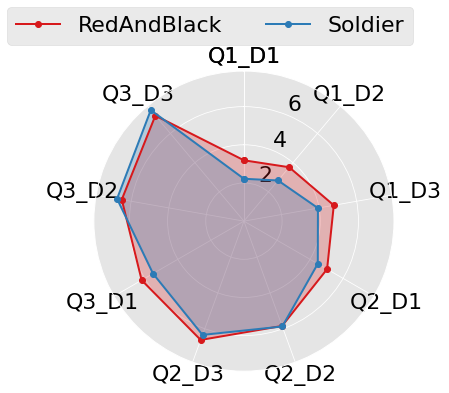

In [27]:

video1=redBlack
video2=soldier
categories = ["{}_{}".format(r1,d125), "{}_{}".format(r1,d250), "{}_{}".format(r1,d500),
              "{}_{}".format(r3,d125), "{}_{}".format(r3,d250), "{}_{}".format(r3,d500),
              "{}_{}".format(r5,d125), "{}_{}".format(r5,d250), "{}_{}".format(r5,d500)]
print(categories)

x_labels = ["Q1_D1", "Q1_D2", "Q1_D3",
            "Q2_D1", "Q2_D2", "Q2_D3",
            "Q3_D1", "Q3_D2", "Q3_D3"]
trace_1 = []
trace_2 = []
for category in categories:
    a = category.split("_")
    trace_1.append(np.average(objects_rates[video1][a[0]][a[1]]))
    trace_2.append(np.average(objects_rates[video2][a[0]][a[1]]))
print(trace_1)

traces = [
    trace_1, trace_2
]
title="quality_radar_task_2"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
plot_radar_v2(categories, traces, [video1, video2], outputPath, title, x_labels)


['r1_d500', 'r3_d500', 'r5_d500', 'r1_d250', 'r3_d250', 'r5_d250', 'r1_d125', 'r3_d125', 'r5_d125']
[4.78125, 6.625, 7.21875, 3.6875, 5.84375, 6.5, 3.1875, 5.03125, 6.1875]
['Q1_D3', 'Q2_D3', 'Q3_D3', 'Q1_D2', 'Q2_D2', 'Q3_D2', 'Q1_D1', 'Q2_D1', 'Q3_D1', 'Q1_D3']
[4.78125, 6.625, 7.21875, 3.6875, 5.84375, 6.5, 3.1875, 5.03125, 6.1875, 4.78125]
[3.9375, 6.34375, 7.59375, 2.78125, 5.875, 6.75, 2.21875, 4.46875, 5.5, 3.9375]


/var/folders/3b/q3j0_8jx1r16_v2mnl8r9w2w0000gn/T/ipykernel_3641/3102720053.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


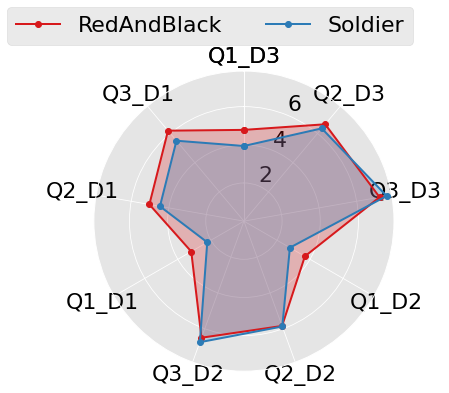

In [28]:

video1=redBlack
video2=soldier
categories = ["{}_{}".format(r1,d500), "{}_{}".format(r3,d500), "{}_{}".format(r5,d500),
              "{}_{}".format(r1,d250), "{}_{}".format(r3,d250), "{}_{}".format(r5,d250),
              "{}_{}".format(r1,d125), "{}_{}".format(r3,d125), "{}_{}".format(r5,d125)]
print(categories)

x_labels = ["Q1_D3", "Q2_D3", "Q3_D3",
            "Q1_D2", "Q2_D2", "Q3_D2",
            "Q1_D1", "Q2_D1", "Q3_D1"]
trace_1 = []
trace_2 = []
for category in categories:
    a = category.split("_")
    trace_1.append(np.average(objects_rates[video1][a[0]][a[1]]))
    trace_2.append(np.average(objects_rates[video2][a[0]][a[1]]))
print(trace_1)

traces = [
    trace_1, trace_2
]
title="quality_radar_task_2_"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
plot_radar_v2(categories, traces, [video1, video2], outputPath, title, x_labels)


# ANOVA

In [29]:
import scipy.stats as stats

q1=r11
q2=r13
q3=r15
video1 = loot
video2 = longDress

s = pd.Series([objects_rates[video1][q1][d500],
     objects_rates[video1][q2][d500],
     objects_rates[video1][q3][d500]],
     index=[q1,q2,q3])
     
df = pd.DataFrame(s.values.tolist(), index=s.index).transpose()
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=[q1,q2,q3])
df_melt.columns = ['sequence', 'qualities', 'value']
# print(df_melt)

for video in [loot, longDress]:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][q1][d500],
                                   objects_rates[video][q2][d500],
                                   objects_rates[video][q3][d500])
     print(video, fvalue, pvalue)

Loot 2.7075296191128957 0.07196057920889881
LongDress 2.096931659693166 0.1286029148801856


In [30]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(qualities)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(qualities),18.583333,2.0,2.70753,0.071961
Residual,319.156250,93.0,NaN,NaN


In [31]:
q1=r31
q2=r33
q3=r35


for video in [loot, longDress]:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][q1][d500],
                                   objects_rates[video][q2][d500],
                                   objects_rates[video][q3][d500])
     print(video, fvalue, pvalue)

Loot 13.465508982035928 7.313772211908573e-06
LongDress 7.923782559456399 0.0006643343349021268


In [33]:
q1=r51
q2=r53
q3=r55

for video in [loot, longDress]:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][q1][d500],
                                   objects_rates[video][q2][d500],
                                   objects_rates[video][q3][d500])
     print(video, fvalue, pvalue)

Loot 18.466442953020128 1.7640856845752267e-07
LongDress 9.69202206662423 0.0001502071475973397


In [34]:
q1=r11
q2=r33
q3=r55

for video in [loot, longDress]:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][q1][d500],
                                   objects_rates[video][q2][d500],
                                   objects_rates[video][q3][d500])
     print(video, fvalue, pvalue)

Loot 33.18625678119349 1.3250521604208071e-11
LongDress 20.59796246648793 3.931681738513539e-08


# Tukey's HSD

In [68]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='qualities', anova_model='value ~ C(qualities)')
res.tukey_summary

/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,r1_r1,r1_r3,0.6875,-0.415631,1.790631,2.099363,0.303508
1,r1_r1,r1_r5,1.0625,-0.040631,2.165631,3.244470,0.061621
2,r1_r3,r1_r5,0.3750,-0.728131,1.478131,1.145107,0.681823


# Combination

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

q1=r31
q2=r33
q3=r35

for qualities in [[r11, r33, r55],
                  [r11, r13, r15],
                  [r31, r33, r35],
                  [r51,r53, r55]]:
    print("\n\n********* {} ********".format(qualities))
    for video in [loot, longDress]:
        print("\t\t====== {} ======".format(video))
        s = pd.Series( [objects_rates[video][qualities[0]][d500],
                        objects_rates[video][qualities[1]][d500],
                        objects_rates[video][qualities[2]][d500]],
        index=qualities)
        
        df = pd.DataFrame(s.values.tolist(), index=s.index).transpose()
        df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=qualities)
        df_melt.columns = ['sequence', 'qualities', 'value']

        # ANOVA: Ordinary Least Squares (OLS) model
        model = ols('value ~ C(qualities)', data=df_melt).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        # Tukey's HSD
        res = stat()
        res.tukey_hsd(df=df_melt, res_var='value', xfac_var='qualities', anova_model='value ~ C(qualities)')
        print(res.tukey_summary)

/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before c



********* ['r1_r1', 'r3_r3', 'r5_r5'] ********
		====== Loot ======
                  sum_sq    df          F        PR(>F)
C(qualities)  160.333333   2.0  33.186257  1.325052e-11
Residual      224.656250  93.0        NaN           NaN
  group1 group2   Diff     Lower     Upper    q-value   p-value
0  r1_r1  r3_r3  2.375  1.449482  3.300518   8.644121  0.001000
1  r1_r1  r5_r5  3.000  2.074482  3.925518  10.918889  0.001000
2  r3_r3  r5_r5  0.625 -0.300518  1.550518   2.274769  0.247408
		====== LongDress ======
                  sum_sq    df          F        PR(>F)
C(qualities)  129.083333   2.0  20.597962  3.931682e-08
Residual      291.406250  93.0        NaN           NaN
  group1 group2    Diff     Lower     Upper   q-value   p-value
0  r1_r1  r3_r3  1.7500  0.695917  2.804083  5.592488  0.001000
1  r1_r1  r5_r5  2.8125  1.758417  3.866583  8.987928  0.001000
2  r3_r3  r5_r5  1.0625  0.008417  2.116583  3.395439  0.047751


********* ['r1_r1', 'r1_r3', 'r1_r5'] ********
		=====

/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before c

  group1 group2     Diff     Lower     Upper   q-value   p-value
0  r1_r1  r1_r3  0.53125 -0.562389  1.624889  1.636315  0.483354
1  r1_r1  r1_r5  0.93750 -0.156139  2.031139  2.887614  0.108067
2  r1_r3  r1_r5  0.40625 -0.687389  1.499889  1.251299  0.639062


********* ['r3_r1', 'r3_r3', 'r3_r5'] ********
		====== Loot ======
                sum_sq    df          F    PR(>F)
C(qualities)   75.5625   2.0  13.465509  0.000007
Residual      260.9375  93.0        NaN       NaN
  group1 group2     Diff     Lower     Upper   q-value   p-value
0  r3_r1  r3_r3  1.78125  0.783794  2.778706  6.015519  0.001000
1  r3_r1  r3_r5  1.96875  0.971294  2.966206  6.648731  0.001000
2  r3_r3  r3_r5  0.18750 -0.809956  1.184956  0.633213  0.887952
		====== LongDress ======
                  sum_sq    df         F    PR(>F)
C(qualities)   47.020833   2.0  7.923783  0.000664
Residual      275.937500  93.0       NaN       NaN
  group1 group2     Diff     Lower     Upper   q-value   p-value
0  r3_r1  r3_r3 

/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


  group1 group2     Diff     Lower     Upper   q-value  p-value
0  r5_r1  r5_r3  2.21875  1.169596  3.267904  7.123786    0.001
1  r5_r1  r5_r5  2.40625  1.357096  3.455404  7.725796    0.001
2  r5_r3  r5_r5  0.18750 -0.861654  1.236654  0.602010    0.900
		====== LongDress ======
                  sum_sq    df         F   PR(>F)
C(qualities)   61.395833   2.0  9.692022  0.00015
Residual      294.562500  93.0       NaN      NaN
  group1 group2     Diff     Lower     Upper   q-value   p-value
0  r5_r1  r5_r3  1.21875  0.158974  2.278526  3.873846  0.020002
1  r5_r1  r5_r5  1.93750  0.877724  2.997276  6.158422  0.001000
2  r5_r3  r5_r5  0.71875 -0.341026  1.778526  2.284576  0.244486


/Users/minhkstn/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


# T-test

In [70]:
from scipy.stats import ttest_ind
q1=r55
q2=r53
q3=r51

for video in [loot, longDress]:
    print("\n\n*********** {} *********".format(video))
    t_stat, p_value = ttest_ind(objects_rates[video][q1][d500], objects_rates[video][q2][d500])
    print("\t {}-{}".format(q1,q2))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)

    t_stat, p_value = ttest_ind(objects_rates[video][q1][d500], objects_rates[video][q3][d500])
    print("\t {}-{}".format(q1,q3))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)

    t_stat, p_value = ttest_ind(objects_rates[video][q2][d500], objects_rates[video][q3][d500])
    print("\t {}-{}".format(q2,q3))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)




*********** Loot *********
	 r5_r5-r5_r3
		T-statistic value:  0.4710294972465546
		P-Value:  0.6392728153173349
	 r5_r5-r5_r1
		T-statistic value:  5.366104796131398
		P-Value:  1.2705650369022641e-06
	 r5_r3-r5_r1
		T-statistic value:  4.703753911893741
		P-Value:  1.472651135168562e-05


*********** LongDress *********
	 r5_r5-r5_r3
		T-statistic value:  1.5934045048530776
		P-Value:  0.11615530677324896
	 r5_r5-r5_r1
		T-statistic value:  4.318392444189669
		P-Value:  5.772625630461604e-05
	 r5_r3-r5_r1
		T-statistic value:  2.802601062164071
		P-Value:  0.006756351369131694


In [71]:
q1=r33
q2=r31
q3=r35

for video in [loot, longDress]:
    print("\n\n*********** {} *********".format(video))
    t_stat, p_value = ttest_ind(objects_rates[video][q1][d500], objects_rates[video][q2][d500])
    print("\t {}-{}".format(q1,q2))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)

    t_stat, p_value = ttest_ind(objects_rates[video][q1][d500], objects_rates[video][q3][d500])
    print("\t {}-{}".format(q1,q3))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)

    t_stat, p_value = ttest_ind(objects_rates[video][q2][d500], objects_rates[video][q3][d500])
    print("\t {}-{}".format(q2,q3))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)




*********** Loot *********
	 r3_r3-r3_r1
		T-statistic value:  4.046530694920346
		P-Value:  0.00014654457914917756
	 r3_r3-r3_r5
		T-statistic value:  -0.5074434415098235
		P-Value:  0.6136440821154096
	 r3_r1-r3_r5
		T-statistic value:  -4.449393641966799
		P-Value:  3.648768982772173e-05


*********** LongDress *********
	 r3_r3-r3_r1
		T-statistic value:  3.150455199708126
		P-Value:  0.0025095186220635483
	 r3_r3-r3_r5
		T-statistic value:  -0.5894578826740592
		P-Value:  0.5576961138574248
	 r3_r1-r3_r5
		T-statistic value:  -3.613537300466448
		P-Value:  0.0006065002197570351


In [72]:
q1=r1
q2=r3

for video in [redBlack]:
    print("\n\n*********** {} *********".format(video))
    t_stat, p_value = ttest_ind(objects_rates[video][q2][d125], objects_rates[video][q1][d500])
    print("\t {}-{}".format(q1,q2))
    print("\t\tT-statistic value: ", t_stat)  
    print("\t\tP-Value: ", p_value)





*********** RedAndBlack *********
	 r1-r3
		T-statistic value:  0.6692200912062044
		P-Value:  0.5058395611237327


# User-centric Analysis

In [73]:
real_object_assessment = "How would you describe the general experience? [I felt the objects were part of the real environment]"
experience_assessment = "How often have you watched/experienced extended reality content (e.g, 360 videos/games, holographic content)?"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"

In [74]:
# map user and response
# get response and ratings data
df_ratings = pd.read_csv('/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results/ratings.csv')
df_survey = pd.read_csv('/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results/survey.csv')
df_survey[[real_object_assessment, experience_assessment]]

,How would you describe the general experience? [I felt the objects were part of the real environment],"How often have you watched/experienced extended reality content (e.g, 360 videos/games, holographic content)?"
0,Neutral,A few times
1,Agree,A few times
2,Strongly disagree,Never
3,Disagree,Never
4,Disagree,Never
5,Agree,Monthly
6,Strongly disagree,Never
7,Neutral,A few times
8,Disagree,A few times
9,Neutral,A few times


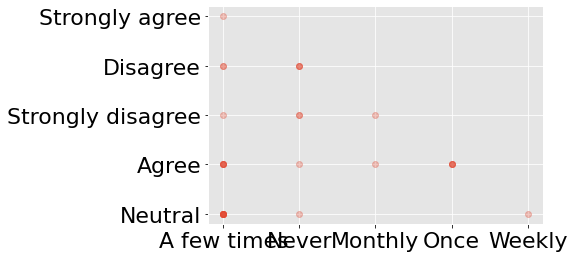

In [75]:
plt.plot(df_survey[experience_assessment], df_survey[real_object_assessment], 'o', alpha=0.3)

In [76]:
experiences = ["Never", "Once", "A few times", "Weekly", "Monthly"]
real_feeling = ["Strongly agree", "Agree", "Neutral", "Disagree", "Strongly disagree"]

real_object_assessment_response = {}
for key in real_feeling:
    real_object_assessment_response[key] = {}
    for key_1 in experiences:
        real_object_assessment_response[key][key_1] = 0

for i in range(len(df_survey[experience_assessment])):
    real_object_assessment_response[df_survey[real_object_assessment][i]][df_survey[experience_assessment][i]] += 1 

real_object_assessment_response

{'Strongly agree': {'Never': 0,
  'Once': 0,
  'A few times': 1,
  'Weekly': 0,
  'Monthly': 0},
 'Agree': {'Never': 1, 'Once': 4, 'A few times': 5, 'Weekly': 0, 'Monthly': 1},
 'Neutral': {'Never': 1,
  'Once': 0,
  'A few times': 9,
  'Weekly': 1,
  'Monthly': 0},
 'Disagree': {'Never': 3,
  'Once': 0,
  'A few times': 2,
  'Weekly': 0,
  'Monthly': 0},
 'Strongly disagree': {'Never': 2,
  'Once': 0,
  'A few times': 1,
  'Weekly': 0,
  'Monthly': 1}}

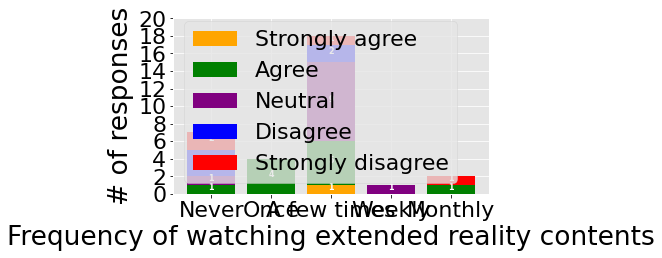

In [77]:
# Stacked bar
x = experiences
y1 = np.array([real_object_assessment_response[real_feeling[0]][i] for i in experiences])
y2 = np.array([real_object_assessment_response[real_feeling[1]][i] for i in experiences])
y3 = np.array([real_object_assessment_response[real_feeling[2]][i] for i in experiences])
y4 = np.array([real_object_assessment_response[real_feeling[3]][i] for i in experiences])
y5 = np.array([real_object_assessment_response[real_feeling[4]][i] for i in experiences])

fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(x, y1, color='orange')
ax.bar(x, y2, bottom=y1, color='g')
ax.bar(x, y3, bottom=y1+y2, color='purple')
ax.bar(x, y4, bottom=y1+y2+y3,color='b')
ax.bar(x, y5, bottom=y1+y2+y3+y4, color='r')

# Labels
for bar in ax.patches:
  if bar.get_height() > 0:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()), ha = 'center',
            color = 'w', weight = 'bold', size = 8)

ax.legend(real_feeling)
plt.xlabel("Frequency of watching extended reality contents")
plt.ylabel("# of responses")

plt.ylim(0, 20)
plt.yticks(np.arange(0, 22, 2))

plt.tight_layout()
plt.savefig("{}/{}.pdf".format(outputPath, "experience_expectation_label"))

plt.show()

# calculate contrast
https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image

In [83]:
import cv2
import numpy as np

imgs = ['loot_vox10_1000.png', 'longdress_vox10_1051.png', 'redandblack_vox10_1450.png', 'soldier_vox10_0536.png']
def getContrastFromFiles(root, img_names):
    contrasts = {}
    for img_name in img_names:
        img = cv2.imread(root + img_name)
        contrast = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrasts[img_name] = contrast.std()

    return contrasts


In [84]:
getContrastFromFiles('/Users/minhkstn/Downloads/', imgs)

{'loot_vox10_1000.png': 38.82098408271875,
 'longdress_vox10_1051.png': 43.70878281459569,
 'redandblack_vox10_1450.png': 31.080405616667218,
 'soldier_vox10_0536.png': 45.68914511849266}

In [81]:
import os
import cv2
import numpy as np

def getContrastFromFolder(path):
    contrasts = []
    for f in os.listdir(path):
        img = cv2.imread(path + f)
        img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrasts.append(img_cvt.std())
    print('{}: {}'.format(path, np.average(contrasts)))
    return np.average(contrasts)

In [85]:
getContrastFromFolder('/Users/minhkstn/Downloads/redandblack/')
getContrastFromFolder('/Users/minhkstn/Downloads/loot/')
getContrastFromFolder('/Users/minhkstn/Downloads/longdress/')
getContrastFromFolder('/Users/minhkstn/Downloads/soldier/')

/Users/minhkstn/Downloads/redandblack/: 29.612291597692455
/Users/minhkstn/Downloads/loot/: 38.80138272971711
/Users/minhkstn/Downloads/longdress/: 43.682672181441
/Users/minhkstn/Downloads/soldier/: 45.50615020265043


45.50615020265043